## Imports

In [1]:
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend
import tensorflow as tf
print(tf.__version__)

#Unet network
def unet(pretrained_weights = None,input_size = (128,128,1)):
    size_filter_in = 16
    #kernel_init = 'glorot_uniform'
    kernel_init = 'he_normal'
    activation_layer = None
    inputs = Input(input_size)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
    conv1 = LeakyReLU()(conv1)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
    conv1 = LeakyReLU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
    conv2 = LeakyReLU()(conv2)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
    conv2 = LeakyReLU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
    conv3 = LeakyReLU()(conv3)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
    conv3 = LeakyReLU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
    conv4 = LeakyReLU()(conv4)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
    conv4 = LeakyReLU()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
    conv5 = LeakyReLU()(conv5)
    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
    conv5 = LeakyReLU()(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
    up6 = LeakyReLU()(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
    conv6 = LeakyReLU()(conv6)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
    conv6 = LeakyReLU()(conv6)
    up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
    up7 = LeakyReLU()(up7)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
    conv7 = LeakyReLU()(conv7)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
    conv7 = LeakyReLU()(conv7)
    up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
    up8 = LeakyReLU()(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
    conv8 = LeakyReLU()(conv8)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
    conv8 = LeakyReLU()(conv8)

    up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
    up9 = LeakyReLU()(up9)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

    model = Model(inputs,conv10)

    model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])

    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

2.19.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ML_audio/'

Mounted at /content/gdrive


In [3]:
import librosa
import os, inspect
import pathlib
# ==== paths ====
currentdir = os.getcwd()
datadir = f"{currentdir}/data"
file_no_dolby = "ELO_1_raw.wav"
file_dolby    = "ELO_1_clean.wav"

# ==== audio params ====
sr = 44100

frame_length = 32768        # ~0.74 sec
hop_length_frame = 16384   # 50% overlap

# ==== spectrogram params ====
dim_square_spec = 128
n_fft = 255
hop_length_fft = 256


In [4]:
y_no_dolby, sr1 = librosa.load(
    os.path.join(root_path, file_no_dolby),
    sr=sr,
    mono=True
)

y_dolby, sr2 = librosa.load(
    os.path.join(root_path, file_dolby),
    sr=sr,
    mono=True
)

print("No Dolby length:", y_no_dolby.shape[0])
print("Dolby length   :", y_dolby.shape[0])


No Dolby length: 13149729
Dolby length   : 13149729


In [5]:
from data_tools import audio_to_audio_frame_stack
frames_no = audio_to_audio_frame_stack(
    y_no_dolby, frame_length, hop_length_frame
)

frames_do = audio_to_audio_frame_stack(
    y_dolby, frame_length, hop_length_frame
)

print(frames_no.shape, frames_do.shape)


(801, 32768) (801, 32768)


In [6]:
from data_tools import numpy_audio_to_matrix_spectrogram
X_mag_db, X_phase = numpy_audio_to_matrix_spectrogram(
    frames_no,
    dim_square_spec,
    n_fft,
    hop_length_fft
)

# Spectrograms for DOLBY (target)
Y_mag_db, Y_phase = numpy_audio_to_matrix_spectrogram(
    frames_do,
    dim_square_spec,
    n_fft,
    hop_length_fft
)

print(X_mag_db.shape, Y_mag_db.shape)


(801, 128, 128) (801, 128, 128)


In [7]:
X_in = X_mag_db
X_ou = X_in - Y_mag_db


In [8]:
from data_tools import scaled_in, scaled_ou

X_in = scaled_in(X_in)
X_ou = scaled_ou(X_ou)


In [9]:
from scipy import stats
print(stats.describe(X_in.reshape(-1,1)))
print(stats.describe(X_ou.reshape(-1,1)))
print(X_in.shape, X_ou.shape)


DescribeResult(nobs=np.int64(13123584), minmax=(array([-0.68]), array([0.92])), mean=array([-0.03963892]), variance=array([0.10911229]), skewness=array([0.15955907]), kurtosis=array([-0.47248807]))
DescribeResult(nobs=np.int64(13123584), minmax=(array([-0.64966434]), array([0.4505512])), mean=array([-0.02981779]), variance=array([0.00171091]), skewness=array([0.68130416]), kurtosis=array([-0.36917975]))
(801, 128, 128) (801, 128, 128)


In [10]:
X_in = X_in.reshape(X_in.shape[0], X_in.shape[1], X_in.shape[2], 1)
X_ou = X_ou.reshape(X_ou.shape[0], X_ou.shape[1], X_ou.shape[2], 1)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_in, X_ou, test_size=0.1, random_state=42)


In [12]:
import tensorflow as tf

# Check available GPUs (TensorFlow 2.x way)
print("GPUs available:", tf.config.list_physical_devices('GPU'))
print("Devices visible to TensorFlow:")
for device in tf.config.list_physical_devices():
    print(device)


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Devices visible to TensorFlow:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [13]:
from model_unet import unet
from tensorflow.keras.callbacks import ModelCheckpoint

generator_nn = unet()
checkpoint = ModelCheckpoint('model_best.h5', monitor='val_loss', save_best_only=True)
history = generator_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=9, batch_size=80, callbacks=[checkpoint])


2.19.0
Epoch 1/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0823 - mae: 0.3100

9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 490ms/step - loss: 0.0782 - mae: 0.2982 - val_loss: 0.0031 - val_mae: 0.0591
Epoch 2/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0033 - mae: 0.0622

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0033 - mae: 0.0618 - val_loss: 0.0020 - val_mae: 0.0491
Epoch 3/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0018 - mae: 0.0473 - val_loss: 0.0158 - val_mae: 0.1340
Epoch 4/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0014 - mae: 0.0417

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0014 - mae: 0.0415 - val_loss: 0.0019 - val_mae: 0.0513
Epoch 5/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0011 - mae: 0.0360

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0011 - mae: 0.0360 - val_loss: 0.0019 - val_mae: 0.0505
Epoch 6/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 8.5681e-04 - mae: 0.0321 - val_loss: 0.0020 - val_mae: 0.0519
Epoch 7/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 7.2897e-04 - mae: 0.0296 - val_loss: 0.0027 - val_mae: 0.0613
Epoch 8/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 6.5150e-04 - mae: 0.0279 - val_loss: 0.0029 - val_mae: 0.0637
Epoch 9/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 5.9369e-04 - mae: 0.0266 - val_loss: 0.0035 - val_mae: 0.0702


In [14]:
generator_nn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ leaky_re_lu[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ leaky_re_lu_1[0]… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ leaky_re_lu_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ leaky_re_lu_3[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ leaky_re_lu_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ leaky_re_lu_5[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[

 Total params: 5,823,281 (22.21 MB)

 Trainable params: 1,941,093 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,882,188 (14.81 MB)

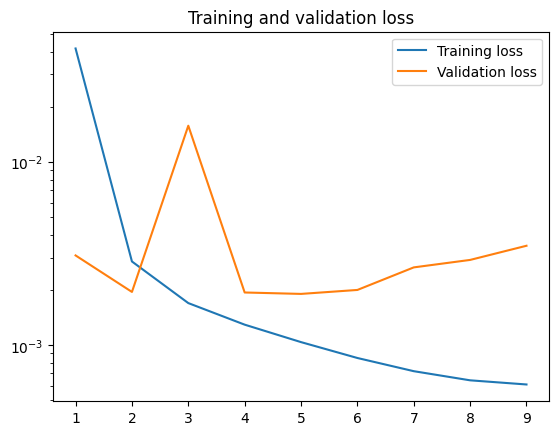

In [15]:
#Plot training and validation loss
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.yscale('log')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
#Predict and QC the output
X_pred_test = generator_nn.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


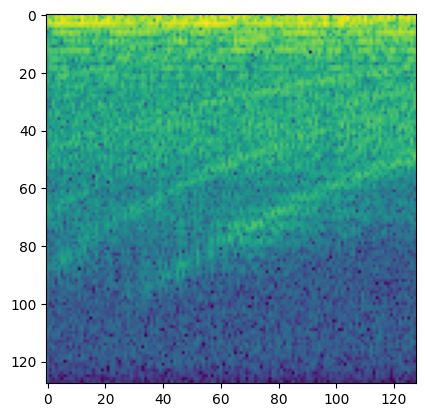

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
id = 30
plt.imshow(X_test[id,:,:,0])

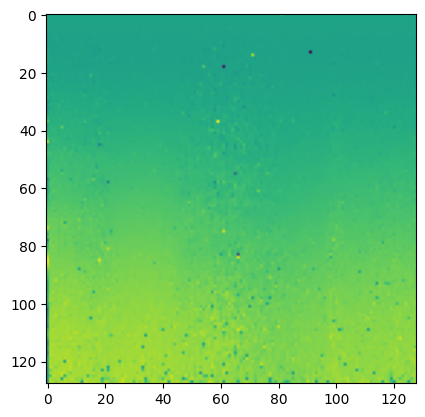

In [20]:
plt.imshow(y_test[id,:,:,0])

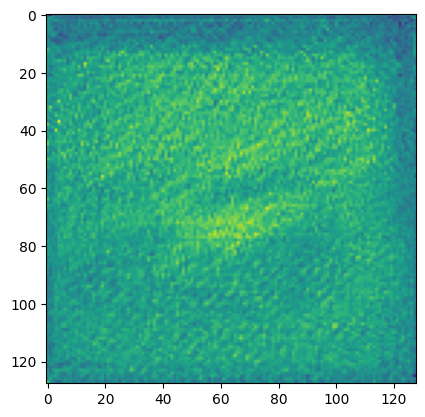

In [21]:
plt.imshow(X_pred_test[id,:,:,0])

In [24]:
generator_nn.save(root_path + 'model_best.keras')
print("Saved model to disk")

Saved model to disk


In [26]:
# Save model structure to disk
model_json = generator_nn.to_json()
with open(root_path + "mod_unet_last_weights.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
generator_nn.save_weights(root_path + "mod_unet_last_weights.weights.h5")
print("Saved model to disk (structure + weights separately)")


Saved model to disk (structure + weights separately)
